---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [50]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [51]:
def answer_one():
        
    # Your Code Here
    employee_movie_choices = pd.read_csv('Employee_Movie_Choices.txt', sep="\t")
    G = nx.from_pandas_dataframe(employee_movie_choices, '#Employee', 'Movie')
    return G
answer_one()

<IPython.core.display.Javascript object>


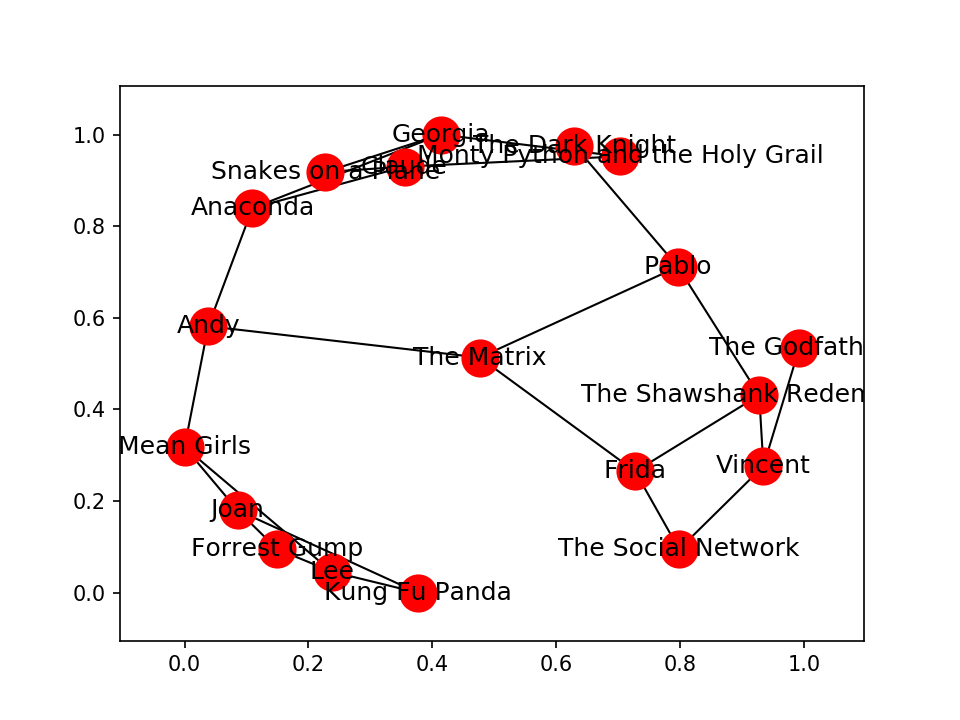

In [103]:
plot_graph(answer_one(), weight_name=None)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [60]:
def answer_two():
    
    employee_movie_choices = pd.read_csv('Employee_Movie_Choices.txt', sep="\t")
    G = nx.from_pandas_dataframe(employee_movie_choices, '#Employee', 'Movie')
    for i in G.nodes():
        if i  in employees:
            G.add_node(i, type="employee")
        if i  in movies:
            G.add_node(i, type="movies")
    
    return G
answer_two()

In [65]:
# G = answer_two()
# G.edges(data=True)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [67]:
# employee_movie_choices = pd.read_csv('Employee_Movie_Choices.txt', sep="\t")
# G = nx.from_pandas_dataframe(employee_movie_choices, '#Employee', 'Movie')
# for i in G.nodes():
#     if i  in employees:
#         G.add_node(i, type="employee")
#     if i  in movies:
#         G.add_node(i, type="movies")
# G2 = bipartite.weighted_projected_graph(G,employees)
# G2.edges(data=True)

In [68]:
def answer_three():
        
    employee_movie_choices = pd.read_csv('Employee_Movie_Choices.txt', sep="\t")
    G = nx.from_pandas_dataframe(employee_movie_choices, '#Employee', 'Movie')
    for i in G.nodes():
        if i  in employees:
            G.add_node(i, type="employee")
        if i  in movies:
            G.add_node(i, type="movies")
    G2 = bipartite.weighted_projected_graph(G,employees)
    
    return G2
answer_three()

In [72]:
G2 = answer_three()
G2.edges(data=True)

[('Claude', 'Georgia', {'weight': 3}),
 ('Claude', 'Andy', {'weight': 1}),
 ('Joan', 'Lee', {'weight': 3}),
 ('Joan', 'Andy', {'weight': 1}),
 ('Pablo', 'Frida', {'weight': 2}),
 ('Pablo', 'Vincent', {'weight': 1}),
 ('Pablo', 'Andy', {'weight': 1}),
 ('Frida', 'Vincent', {'weight': 2}),
 ('Frida', 'Andy', {'weight': 1}),
 ('Andy', 'Lee', {'weight': 1}),
 ('Andy', 'Georgia', {'weight': 1})]

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [102]:
def answer_four():
        
    G2 = answer_three()
    G2.edges(data=True)
    
    df = pd.DataFrame(G2.edges(data=True), columns=['First', 'Second', 'Common_movies'])
    df2 = pd.DataFrame(G2.edges(data=True), columns=['Second', 'First', 'Common_movies'])
    df['Common_movies'] = df['Common_movies'].map(lambda x: x['weight'])
    df2['Common_movies'] = df2['Common_movies'].map(lambda x: x['weight'])
    df = pd.concat([df,df2])
    employee_relationships = pd.read_csv('Employee_Relationships.txt', sep="\t",header=None)
    employee_relationships.columns=['First','Second',"Relations"]
    result_df = pd.merge(employee_relationships,df,how='left',left_on=['First','Second'],right_on=['First','Second'])
    result_df['Common_movies'] = result_df['Common_movies'].fillna(0)
    return result_df['Common_movies'].corr(result_df['Relations'])
answer_four()

0.78839622217334737